<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Project Topic: Trend-based Trading Strategies</h1>
<h3 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Author: JeffLin99, Email: jeffhengyu1999@hotmail.com</h3>

## Project Description:
### Study of strategy results and evaluation of trend-based trading strategies under different technical indicators, strategy rules, etc.

### Background
#### Technical analysis focuses on the historical price and trading volume of securities to find price trends and thus predict future prices.

### Strategies Implemented
<p> 1) Double SMA trading strategy based on 5-day and 20-day simple averages
<p> &nbsp;&nbsp;&nbsp;&nbsp; - Technical Indicator: Simple Averages
<p> &nbsp;&nbsp;&nbsp;&nbsp; - Test data: GME 2022-01 to 2023-8 closing prices
<p> &nbsp;&nbsp;&nbsp;&nbsp; - Strategy Idea
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  ~ The use of golden cross and death cross as a signal to open buy and close sell positions
<p> &nbsp;&nbsp;&nbsp;&nbsp; - Specific conditions for opening and closing positions
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ~ Positions are opened on signals, closed and reversed on reverse signals.
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -> 5-day simple average breaks above the 20-day simple average as a buy signal.
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -> A downward break of the 5-day simple average above the 20-day simple average is a sell signal.
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ~ Close a position immediately when a loss occurs on opening the position

<p> 2) Trading Strategies Based on Exponentially Moving Average Convergence Divergence (MACD)
<p> &nbsp;&nbsp;&nbsp;&nbsp; - Technical Indicator: Moving Average Convergence Divergence (MACD)
<p> &nbsp;&nbsp;&nbsp;&nbsp; - Test data: GME 2022-01 to 2023-8 closing prices
<p> &nbsp;&nbsp;&nbsp;&nbsp; - Strategy Idea
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  ~ Utilize the divergence (trend strengthening) and convergence (trend slowing) of the long and short-term moving averages reflected by this technical indicator to formulate trading strategies.
<p> &nbsp;&nbsp;&nbsp;&nbsp; - Specific conditions for opening and closing positions
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ~ Signal for Opening a Position: When DIF and DEA are both positive, it's a bullish market. A DIF crossover above DEA (MACD turning positive) is a buy signal. A DIF crossover below DEA (MACD turning negative) is a sell signal.
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ~ Signal for Closing a Position and Reversing: When DIF and DEA are both positive and negative, it's a bearish market. A DIF crossover below DEA (MACD turning negative) is a sell signal. A DIF crossover above DEA (MACD turning positive) is a buy signal.
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ~ Additional Signals: When DIF falls below the zero axis (death cross), it's a sell signal. When DIF crosses above the zero axis (golden cross), it's a buy signal.
<p> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ~ Close a position immediately when a loss occurs on opening the position

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
def smaCal(tsPrice,k):
    Sma=pd.Series(0.0,index=tsPrice.index)
    for i in range(k-1,len(tsPrice)):
        Sma[i]=sum(tsPrice[(i-k+1):(i+1)])/k
    return(Sma)

def wmaCal(tsPrice,weight):
    k=len(weight)
    arrWeight=np.array(weight)
    Wma=pd.Series(0.0,index=tsPrice.index)
    for i in range(k-1,len(tsPrice)):
        Wma[i]=sum(arrWeight*tsPrice[(i-k+1):(i+1)])
    return(Wma)

def ewmaCal(tsprice,period=5,exponential=0.2):
    Ewma=pd.Series(0.0,index=tsprice.index)
    Ewma[period-1]=np.mean(tsprice[0:period])
    for i in range(period,len(tsprice)):
        Ewma[i]=exponential*tsprice[i]+(1-exponential)*Ewma[i-1]
    return(Ewma)

In [3]:
#　Read the data from YahooFinance
stock = 'GME'
stockdata=yf.Ticker(stock).history(period="max")
stockdata=stockdata.iloc[:,1:]
CBClose=stockdata.Close
CBClose

Date
2002-02-13 00:00:00-05:00     1.691666
2002-02-14 00:00:00-05:00     1.683251
2002-02-15 00:00:00-05:00     1.674834
2002-02-19 00:00:00-05:00     1.607504
2002-02-20 00:00:00-05:00     1.662210
                               ...    
2023-08-28 00:00:00-04:00    17.570000
2023-08-29 00:00:00-04:00    18.240000
2023-08-30 00:00:00-04:00    18.370001
2023-08-31 00:00:00-04:00    18.549999
2023-09-01 00:00:00-04:00    18.420000
Name: Close, Length: 5426, dtype: float64

## （1）Double SMA trading strategy based on 5-day and 20-day simple averages

In [4]:
# Stock Price Moving Average Parameter Setting
Sma10=smaCal(CBClose,10)
weight=np.array(range(1,11))/sum(range(1,11))
Wma10=wmaCal(CBClose,weight)
expo= 2/(len(CBClose)+1)  # Set custom exponential moving average smoothing parameters
Ema10=ewmaCal(CBClose,10,expo)

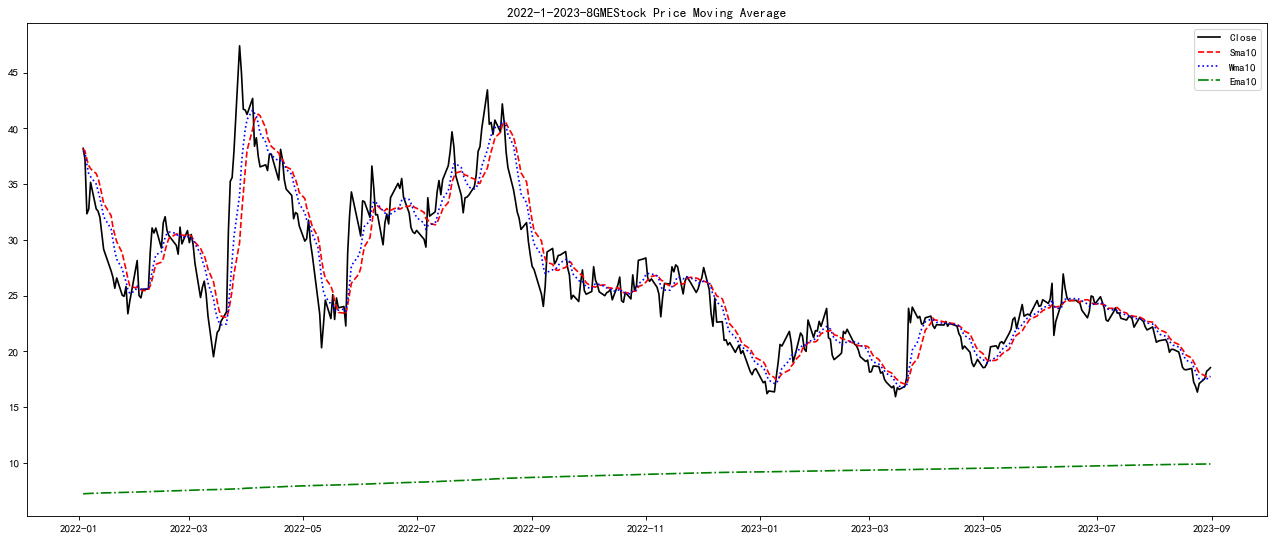

In [5]:
startPeriod='2022-1'# Transaction start date
endPeriod='2023-8' # Transaction end date
# Plotting 10-day simple averages, weighted averages, exponential moving averages
plt.figure(figsize=(20,8),dpi=80)  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(CBClose[10:][startPeriod:endPeriod],label="Close",color='k')
plt.plot(Sma10[10:][startPeriod:endPeriod],label="Sma10",color='r',linestyle='dashed')
plt.plot(Wma10[10:][startPeriod:endPeriod],label="Wma10",color='b',linestyle=':')
plt.plot(Ema10[10:][startPeriod:endPeriod],label="Ema10",color='g',linestyle='-.')
plt.title(startPeriod+'-'+endPeriod+stock+"Stock Price Moving Average")
plt.legend()

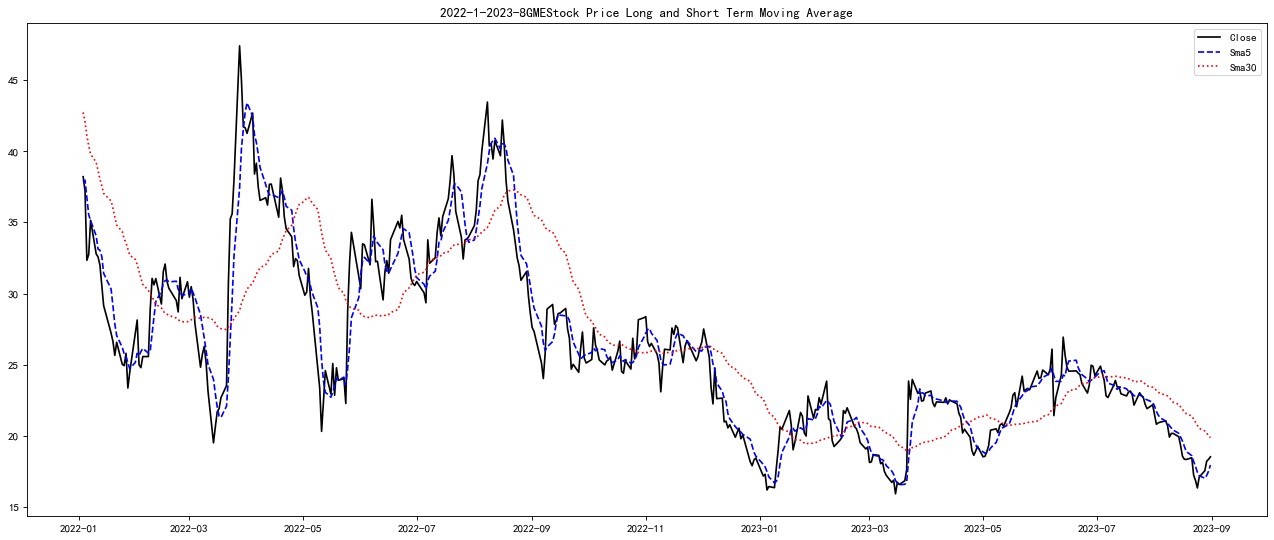

In [6]:
# Stock price long and short term moving average parameter settings
Sma5=smaCal(CBClose,5)  #short-term moving average
Sma30=smaCal(CBClose,30)  #long-term moving average

# Plotting 5-day and 30-day simple averages
plt.figure(figsize=(20,8),dpi=80)  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(CBClose[30:][startPeriod:endPeriod],label="Close",color='k')
plt.plot(Sma5[30:][startPeriod:endPeriod],label="Sma5",color='b',linestyle='dashed')
plt.plot(Sma30[30:][startPeriod:endPeriod],label="Sma30",color='r',linestyle=':')
plt.title(startPeriod+'-'+endPeriod+stock+"Stock Price Long and Short Term Moving Average")
plt.legend()

In [7]:
# Define trading signals: buy (sell) at the closing price on the day the signal is generated, sell (buy) at the closing price on the day the next reversal signal occurs, and close the position immediately if there is a loss when opening the position.
def SignalLS(Signal,CBRet): # Can buy and sell short
    Signalpro=pd.Series(0,index=Signal.index)
    i=0
    while Signal[i]==0:
        i=i+1       
    Signalpro[i]=Signal[i] # First signal to open a position
    for i1 in range(i+1,len(Signal)):        
        if Signal[i1]==0:  
            Signalpro[i1]=Signalpro[i1-1];# No new signals, keep the same position
        elif Signal[i1]*Signalpro[i1-1]>0: 
            Signalpro[i1]=Signalpro[i1-1]+Signal[i1];# The new signal is the same as the original signal, add positions along the original position
        elif Signal[i1]*Signalpro[i1-1]<0: 
            Signalpro[i1]=Signal[i1];# The new signal is different from the original signal, original position is closed and position is opened based on the new signal
    flag=Signalpro[i]
    for i2 in range(i+1,len(Signal)):
        if Signalpro[i2]*flag>0:
            if CBRet[i2]*CBRet[i2-1]<0:
                Signalpro[i2]=0
                flag=-flag
        else:
            Signalpro[i2]=0
    return Signalpro

In [8]:
Ns=5  # Short Term
Nl=20   # Long Term
smaNs=smaCal(CBClose,Ns);
smaNl=smaCal(CBClose,Nl);
SLSignal=pd.Series(0,index=smaNl.index)
for i in range(Nl,len(smaNl)):
    if all([smaNs[i]>smaNl[i],smaNs[i-1]<smaNl[i-1]]):
        SLSignal[i]=1
    elif all([smaNs[i]<smaNl[i],smaNs[i-1]>smaNl[i-1]]):
         SLSignal[i]=-1
SLSignal=SLSignal[startPeriod:endPeriod]
CBRet=CBClose/CBClose.shift(1)-1 # Stock Daily Returns
CBRet=CBRet.dropna()
CBRet=CBRet[startPeriod:endPeriod]
SLSignal1=SignalLS(SLSignal,CBRet) # long and short
SLSTrade1=SLSignal1.shift(1).dropna() #Second phase of trading after the breach
SLSRet1=(CBRet*SLSTrade1).dropna() # Daily returns of the trading account (assuming buying at the closing price on the day the signal is generated and selling on the day the next reversal signal appears).
Ret1=SLSRet1        
Signal=SLSignal       
Signal1=SLSignal1

In [9]:
# Cumulative return of the stock itself versus the MA strategy 
cumStock=np.cumprod(1+CBRet[startPeriod:endPeriod])-1 #cumulative yield
cumTrade1=np.cumprod(1+Ret1[startPeriod:endPeriod])-1
TotcumStock=cumStock+1
TotcumTrade1=cumTrade1+1
drawdown_stock=(TotcumStock.cummax()-TotcumStock)/TotcumStock.cummax()
drawdown_trade1=(TotcumTrade1.cummax()-TotcumTrade1)/TotcumTrade1.cummax()
CBRetYmean=245*CBRet[startPeriod:endPeriod].mean()
CBRetYstd=np.sqrt(245)*CBRet[startPeriod:endPeriod].std()
Ret1Ymean=245*Ret1[startPeriod:endPeriod].mean()
Ret1Ystd=np.sqrt(245)*Ret1[startPeriod:endPeriod].std()
print('The cumulative return on the stock = %.2f%%, The maximum drawdown = %.2f%%'%(100*cumStock[-1],100*drawdown_stock.max()))
print('The cumulative return of the double SMA strategy = %.2f%%, The maximum drawdown = %.2f%%'%(100*cumTrade1[-1],100*drawdown_trade1.max()))   
print('The average annual stock return = %.2f%%, The standard deviation = %.2f%%, Sharpe ratio = %.2f'%(100*CBRetYmean,100*CBRetYstd,CBRetYmean/CBRetYstd))
print('The average annual return of the double SMA strategy = %.2f%%, The standard deviation = %.2f%%, Sharpe ratio = %.2f'%(100*Ret1Ymean,100*Ret1Ystd,Ret1Ymean/Ret1Ystd))

The cumulative return on the stock = -50.00%, The maximum drawdown = 66.35%
The cumulative return of the double SMA strategy = -4.60%, The maximum drawdown = 38.78%
The average annual stock return = -1.64%, The standard deviation = 90.27%, Sharpe ratio = -0.02
The average annual return of the double SMA strategy = 1.26%, The standard deviation = 29.17%, Sharpe ratio = 0.04


<Figure size 640x480 with 0 Axes>

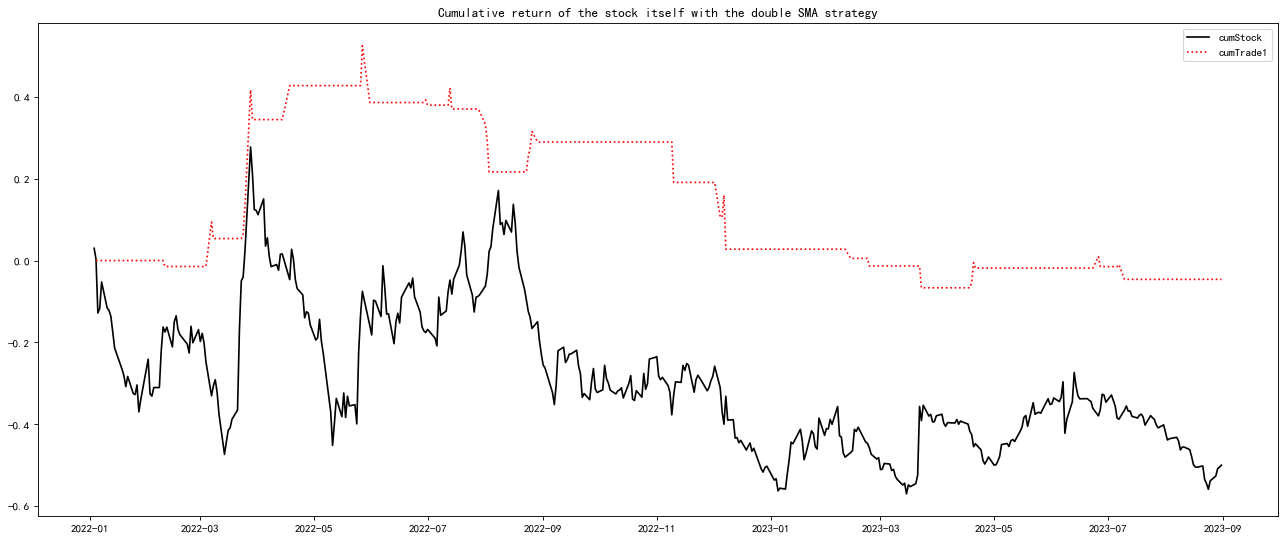

In [10]:
plt.figure()
plt.figure(figsize=(20,8),dpi=80)  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
sP=startPeriod
eP=endPeriod 
plt.plot(cumStock[sP:eP],label="cumStock",color='k')
plt.plot(cumTrade1[sP:eP],label="cumTrade1",color='r',linestyle=':')
plt.title("Cumulative return of the stock itself with the double SMA strategy")
plt.legend()

<Figure size 640x480 with 0 Axes>

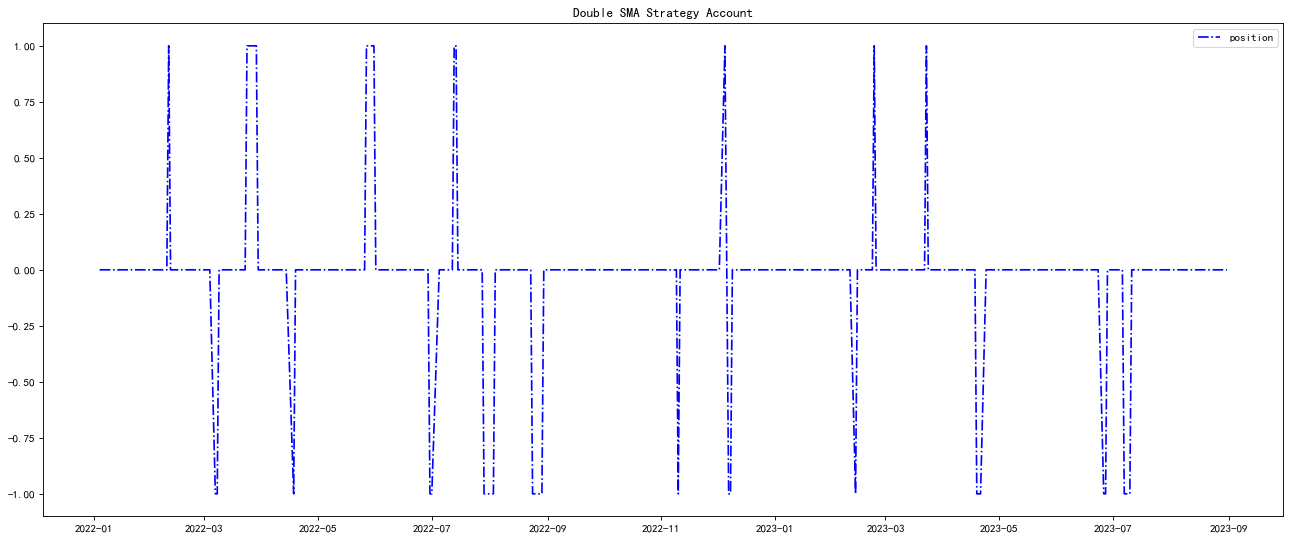

In [11]:
plt.figure()
plt.figure(figsize=(20,8),dpi=80)  
plt.plot(SLSTrade1[sP:eP],label="position",color='b',linestyle='-.')
plt.title("Double SMA Strategy Account")
plt.legend()

In [12]:
cumT=cumTrade1[Signal!=0]
cumT[cumTrade1.index[-1]]=cumTrade1[-1]
cumTrade1Dif=cumT.diff().fillna(0)#.dropna()
Winrate=len(cumTrade1Dif[cumTrade1Dif>0])/len(cumTrade1Dif[cumTrade1Dif!=0])
print('Traded %d times，Of these, positive returns have been %d times，The trading win rate is %.1f%%'%(len(cumTrade1Dif[cumTrade1Dif!=0]),len(cumTrade1Dif[cumTrade1Dif>0]),100*Winrate)) #Output Trading Winning Ratio
cumdata1=pd.DataFrame({'cumTrade1':cumTrade1, 'cumStock':cumStock,'Signal1':Signal1,'Signal':Signal,'cumTradeDif':cumTrade1Dif,'cumStockDif':cumStock[cumTrade1Dif.index].diff().fillna(0)})
cumdata1.loc[cumT.index]

Traded 18 times，Of these, positive returns have been 6 times，The trading win rate is 33.3%


,cumTrade1,cumStock,Signal1,Signal,cumTradeDif,cumStockDif
Date,,,,,,
2022-02-09 00:00:00-05:00,0.000000,-0.162410,1,1,0.000000,0.000000
2022-03-04 00:00:00-05:00,-0.014643,-0.247523,-1,-1,-0.014643,-0.085114
2022-03-23 00:00:00-04:00,0.053686,-0.049801,1,1,0.068329,0.197722
2022-04-14 00:00:00-04:00,0.344384,0.016039,-1,-1,0.290698,0.065840
2022-05-26 00:00:00-04:00,0.427399,-0.134308,1,1,0.083015,-0.150347
2022-06-29 00:00:00-04:00,0.386064,-0.172047,-1,-1,-0.041335,-0.037738
2022-07-12 00:00:00-04:00,0.379630,-0.075949,1,1,-0.006433,0.096098
2022-07-28 00:00:00-04:00,0.370374,-0.087809,-1,-1,-0.009257,-0.011861
2022-08-03 00:00:00-04:00,0.216662,0.022441,0,1,-0.153712,0.110250


## （2）Trading Strategies Based on Exponentially Moving Average Convergence Divergence (MACD)

In [13]:
# Calculate stock deviation DIF, Divergence Average DEA, and MACD
DIF=ewmaCal(CBClose,12,2/(1+12))-ewmaCal(CBClose,26,2/(1+26))
DEA=ewmaCal(DIF,9,2/(1+9))
MACD=2*(DIF-DEA)

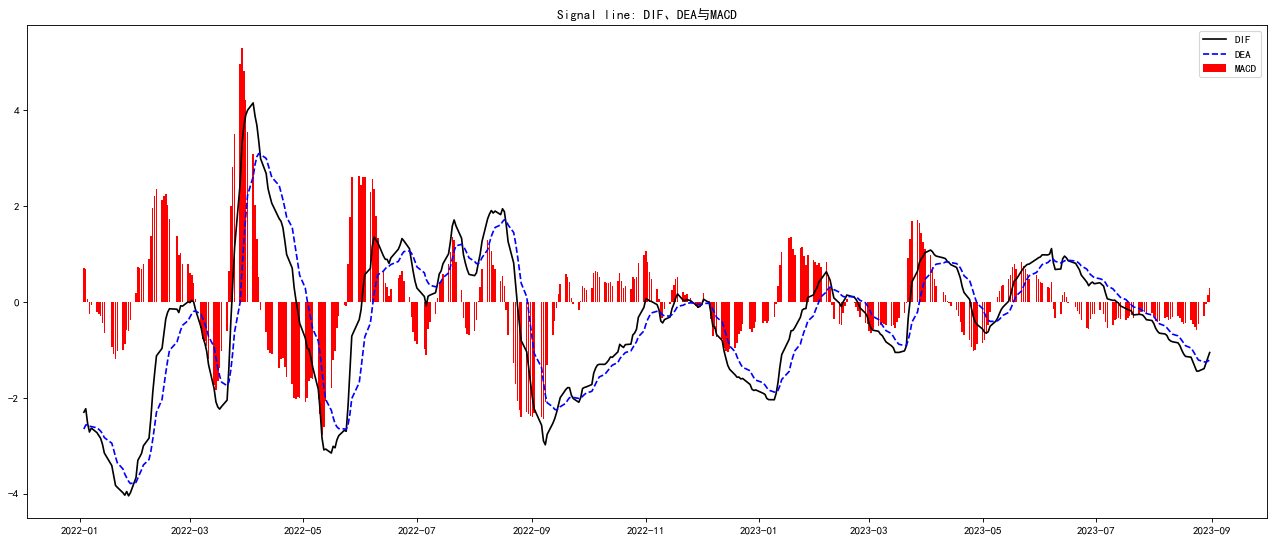

In [14]:
plt.figure(figsize=(20,8),dpi=80)  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(DIF[sP:eP],label="DIF",color='k')
plt.plot(DEA[sP:eP], label="DEA",color='b',linestyle='dashed')
plt.bar(MACD[sP:eP].index,height=MACD[sP:eP],label='MACD',color='r')
plt.title("Signal line: DIF、DEA与MACD")
plt.legend()

In [15]:
# Calculate stock deviation DIF, Divergence Average DEA, and MACD
macdSignal=pd.Series(0,index=DIF.index)
for i in range(35,len(DIF)):
    if all([DIF[i]>DEA[i],DIF[i-1]<DEA[i-1]]):# DIF breaks DEA upwards is a buy signal；
        macdSignal[i]=1
    elif all([DIF[i]<DEA[i],DIF[i-1]>DEA[i-1]]):# DIF breaks DEA downwards is a sell signal.
        macdSignal[i]=-1

In [16]:
macdSignal=macdSignal[startPeriod:endPeriod]
CBRet=CBClose/CBClose.shift(1)-1 # Stock Daily Returns
CBRet=CBRet.dropna()
CBRet=CBRet[startPeriod:endPeriod]
macdSignal1=SignalLS(macdSignal,CBRet) # long and short
macdTrade1=macdSignal1.shift(1).dropna() #Second phase of trading after the breach
macdTrade=macdSignal.shift(1).dropna()

In [17]:
macdRet1=(CBRet*macdTrade1).dropna() # Daily returns of the trading account (assuming buying at the closing price on the day the signal is generated and selling on the day the next reversal signal appears).

In [18]:
# Cumulative return of the stock itself with the MACD strategy
cumStock=np.cumprod(1+CBRet[startPeriod:endPeriod])-1 #cumulative yield
cumTrade1=np.cumprod(1+macdRet1[startPeriod:endPeriod])-1
TotcumStock=cumStock+1
TotcumTrade1=cumTrade1+1
drawdown_stock=(TotcumStock.cummax()-TotcumStock)/TotcumStock.cummax()
drawdown_macd=(TotcumTrade1.cummax()-TotcumTrade1)/TotcumTrade1.cummax()
CBRetYmean=245*CBRet[startPeriod:endPeriod].mean()
CBRetYstd=np.sqrt(245)*CBRet[startPeriod:endPeriod].std()
macdRet1Ymean=245*macdRet1[startPeriod:endPeriod].mean()
macdRet1Ystd=np.sqrt(245)*macdRet1[startPeriod:endPeriod].std()
print('The cumulative return on the stock = %.2f%%, The maximum drawdown = %.2f%%'%(100*cumStock[-1],100*drawdown_stock.max()))
print('The cumulative return of the MACD strategy = %.2f%%, The maximum drawdown = %.2f%%'%(100*cumTrade1[-1],100*drawdown_macd.max()))   
print('The average annual stock return = %.2f%%, The standard deviation = %.2f%%, Sharpe ratio = %.2f'%(100*CBRetYmean,100*CBRetYstd,CBRetYmean/CBRetYstd))
print('The average annual return of the MACD strategy = %.2f%%, The standard deviation = %.2f%%, Sharpe ratio = %.2f'%(100*macdRet1Ymean,100*macdRet1Ystd,macdRet1Ymean/macdRet1Ystd))

The cumulative return on the stock = -50.00%, The maximum drawdown = 66.35%
The cumulative return of the MACD strategy = 17.12%, The maximum drawdown = 26.58%
The average annual stock return = -1.64%, The standard deviation = 90.27%, Sharpe ratio = -0.02
The average annual return of the MACD strategy = 14.45%, The standard deviation = 32.92%, Sharpe ratio = 0.44


<Figure size 640x480 with 0 Axes>

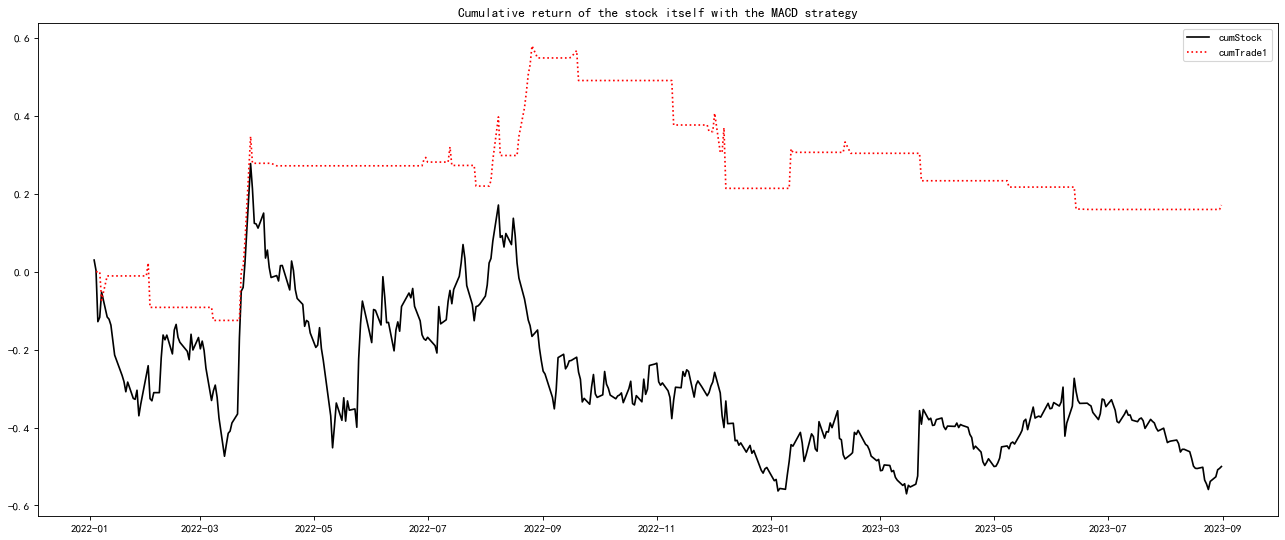

In [19]:
plt.figure()
plt.figure(figsize=(20,8),dpi=80)  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.plot(cumStock[sP:eP],label="cumStock",color='k')
plt.plot(cumTrade1[sP:eP],label="cumTrade1",color='r',linestyle=':')
plt.title("Cumulative return of the stock itself with the MACD strategy")
plt.legend()

<Figure size 640x480 with 0 Axes>

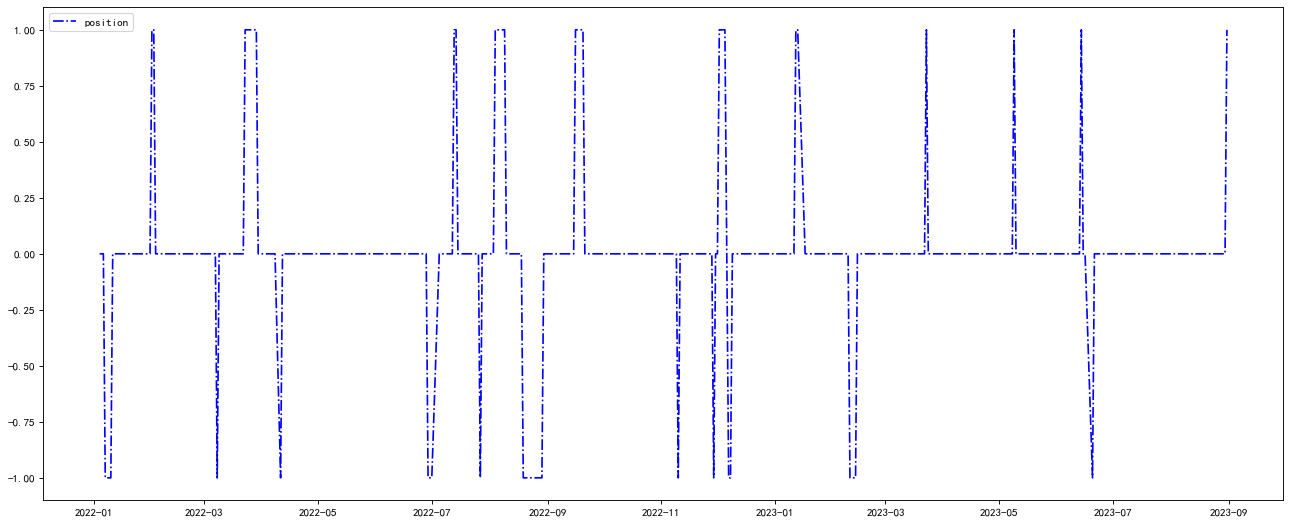

In [20]:
plt.figure()
plt.figure(figsize=(20,8),dpi=80)  
plt.plot(macdTrade1[sP:eP],label="position",color='b',linestyle='-.')
plt.legend()

In [21]:
cumT=cumTrade1[macdSignal!=0]
cumT[cumTrade1.index[-1]]=cumTrade1[-1]
cumTradeDif=cumT.diff().fillna(0)#.dropna()
macdWinrate=len(cumTradeDif[cumTradeDif>0])/len(cumTradeDif[cumTradeDif!=0])
print('Traded %d times，Of these, positive returns have been %d times，The trading win rate is %.1f%%'%(len(cumTradeDif[cumTradeDif!=0]),len(cumTradeDif[cumTradeDif>0]),100*macdWinrate)) #Output Trading Winning Ratio
cumdata1=pd.DataFrame({'cumTrade1':cumTrade1, 'cumStock':cumStock,'macdSignal1':macdSignal1,'macdSignal':macdSignal,'cumTradeDif':cumTradeDif,'cumStockDif':cumStock[cumTradeDif.index].diff().fillna(0)})
cumdata1.loc[cumT.index]

Traded 22 times，Of these, positive returns have been 6 times，The trading win rate is 27.3%


,cumTrade1,cumStock,macdSignal1,macdSignal,cumTradeDif,cumStockDif
Date,,,,,,
2022-01-06 00:00:00-05:00,0.000000,-0.116989,-1,-1,0.000000,0.000000e+00
2022-01-31 00:00:00-05:00,-0.010774,-0.265921,1,1,-0.010774,-1.489319e-01
2022-03-07 00:00:00-05:00,-0.091506,-0.330480,-1,-1,-0.080733,-6.455962e-02
2022-03-22 00:00:00-04:00,-0.124975,-0.170160,1,1,-0.033468,1.603208e-01
2022-04-08 00:00:00-04:00,0.278358,-0.014826,-1,-1,0.403333,1.553339e-01
2022-05-25 00:00:00-04:00,0.271887,-0.223870,0,1,-0.006471,-2.090438e-01
2022-06-28 00:00:00-04:00,0.271887,-0.161803,-1,-1,0.000000,6.206617e-02
2022-07-12 00:00:00-04:00,0.281455,-0.075949,1,1,0.009568,8.585483e-02
2022-07-26 00:00:00-04:00,0.272857,-0.125817,-1,-1,-0.008598,-4.986855e-02
